In [1]:
#指定要列出所有檔案的目錄
mypath="C:/芒果/train2"

In [2]:
import xlrd
import pandas as pd
#原始檔案jpg
#縮小圖片、彩色RGB
from os import listdir
from os.path import isfile, isdir, join
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('C:/芒果/1.csv')
df.head()

,image_id,label,Unnamed: 2
0,00002.jpg,C,3
1,00003.jpg,C,3
2,00004.jpg,B,2
3,00005.jpg,A,1
4,00007.jpg,A,1


In [4]:
df['label']=df['label'].map({'A':0, 'B':1, 'C':2}).astype(int)

In [5]:
train_label=df['label'].values

In [6]:
train_label.reshape(50,1).shape

(50, 1)

In [7]:
df=pd.read_csv('C:/芒果/2.csv')

In [8]:
df['label']=df['label'].map({'A':0, 'B':1, 'C':2}).astype(int)
test_label=df['label'].values
test_label.reshape(20,1).shape

(20, 1)

In [9]:
#匯入Library
from PIL import Image

In [10]:
def read_image(img_name):
    im=Image.open(img_name).convert('RGB')
    data=np.array(im)
    return data
images=[]
for fn in os.listdir('C:/芒果/train2'):
    if fn.endswith('.jpg'):
        fd=os.path.join('C:/芒果/train2',fn)
        images.append(read_image(fd))  #數組添加值

In [11]:
x=np.array(images)

In [12]:
label_dict={1:"output",2:"domestic",3:"process"}
def plot_images_label_prediction(images,labels,prediction,idx,num=20):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>20: num=20
    for i in range(0, num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx], cmap='binary')
        title="label="+str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

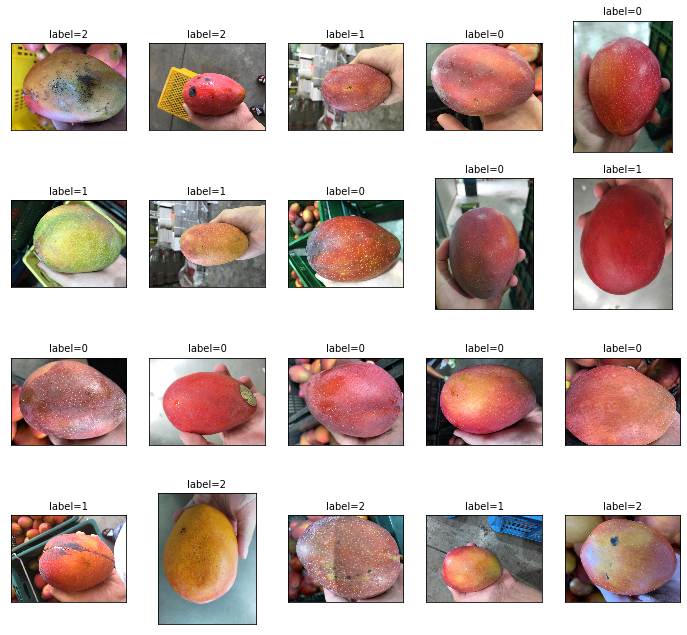

In [13]:
plot_images_label_prediction(x,train_label,[],0,20)

In [14]:
#指定要列出所有檔案的目錄
mypath="C:/芒果/train2"#取得所有檔案與子目錄名稱
files=listdir(mypath)

In [15]:
#以迴圈處裡train image
i=0
Lablestr=''
for f in files:
#產生檔案的絕對路徑
    fullpath=join(mypath,f)
    #判斷fullpath是檔案還是目錄
    if isfile(fullpath) & (os.path.splitext(f)[1]=='.jpg'):
        #print("檔案",f)
#開啟
        im=Image.open(fullpath)
#顯示原圖片大小(像素)
        print("檔案:",fullpath,"類型",im.format,im.size,im.mode)
#變更大小(像素)
        nim=im.resize((224,224),Image.BILINEAR)
#灰階圖檔
        grey_image=nim.convert('RGB')
#檔名的兩個字元為label,E1,1為標籤
        label=os.path.splitext(f)[0][1]
#新檔名(標籤+序號)，副檔名(jpg)
        filenameNew=label+str(i+1)+".jpg"
#完整檔名(path+filename)
        pathfilenameNew=join(mypath,filenameNew)
        print(i+1,':',f,' ',os.path.splitext(f)[0],' ',filenameNew,' ',pathfilenameNew)
#另存新檔
        grey_image.save(pathfilenameNew)
#記錄圖檔的標籤，存成字串
        if(Lablestr=='') :
            Lablestr=str(label)
        else :
            Lablestr=Lablestr+','+str(label)
            
            
        i=i+1
        
    elif isdir(fullpath):
        print("目錄:",f)

檔案: C:/芒果/train2\00002.jpg 類型 JPEG (1344, 1008) RGB
1 : 00002.jpg   00002   01.jpg   C:/芒果/train2\01.jpg
檔案: C:/芒果/train2\00003.jpg 類型 JPEG (1088, 816) RGB
2 : 00003.jpg   00003   02.jpg   C:/芒果/train2\02.jpg
檔案: C:/芒果/train2\00004.jpg 類型 JPEG (1344, 1008) RGB
3 : 00004.jpg   00004   03.jpg   C:/芒果/train2\03.jpg
檔案: C:/芒果/train2\00005.jpg 類型 JPEG (1344, 1008) RGB
4 : 00005.jpg   00005   04.jpg   C:/芒果/train2\04.jpg
檔案: C:/芒果/train2\00007.jpg 類型 JPEG (1152, 1536) RGB
5 : 00007.jpg   00007   05.jpg   C:/芒果/train2\05.jpg
檔案: C:/芒果/train2\00008.jpg 類型 JPEG (1344, 1008) RGB
6 : 00008.jpg   00008   06.jpg   C:/芒果/train2\06.jpg
檔案: C:/芒果/train2\00009.jpg 類型 JPEG (1344, 1008) RGB
7 : 00009.jpg   00009   07.jpg   C:/芒果/train2\07.jpg
檔案: C:/芒果/train2\00010.jpg 類型 JPEG (1344, 1008) RGB
8 : 00010.jpg   00010   08.jpg   C:/芒果/train2\08.jpg
檔案: C:/芒果/train2\00012.jpg 類型 JPEG (1152, 1536) RGB
9 : 00012.jpg   00012   09.jpg   C:/芒果/train2\09.jpg
檔案: C:/芒果/train2\00013.jpg 類型 JPEG (1152, 1536) RGB
10 :

In [19]:
#指定要列出所有檔案的目錄 test image
mypath2="C:/芒果/test2"
#取得所有檔案與子目錄名稱
files=listdir(mypath2)

In [20]:
#以迴圈處裡train image
i=0
Lablestr=''
for f in files:
#產生檔案的絕對路徑
    fullpath=join(mypath2,f)
    #判斷fullpath是檔案還是目錄
    if isfile(fullpath) & (os.path.splitext(f)[1]=='.jpg'):
        #print("檔案",f)
#開啟
        im=Image.open(fullpath)
#顯示原圖片大小(像素)
        print("檔案:",fullpath,"類型",im.format,im.size,im.mode)
#變更大小(像素)
        nim=im.resize((28,28),Image.BILINEAR)
#灰階圖檔
        grey_image=nim.convert('RGB')
#檔名的兩個字元為label,E1,1為標籤
        label=os.path.splitext(f)[0][1]
#新檔名(標籤+序號)，副檔名(jpg)
        filenameNew=label+str(i+1)+".jpg"
#完整檔名(path+filename)
        pathfilenameNew=join(mypath2,filenameNew)
        print(i+1,':',f,' ',os.path.splitext(f)[0],' ',filenameNew,' ',pathfilenameNew)
#另存新檔
        grey_image.save(pathfilenameNew)
#記錄圖檔的標籤，存成字串
        if(Lablestr=='') :
            Lablestr=str(label)
        else :
            Lablestr=Lablestr+','+str(label)
            
            
        i=i+1
        
    elif isdir(fullpath):
        print("目錄:",f)
    

檔案: C:/芒果/test2\00027.jpg 類型 JPEG (1152, 1536) RGB
1 : 00027.jpg   00027   01.jpg   C:/芒果/test2\01.jpg
檔案: C:/芒果/test2\00033.jpg 類型 JPEG (1344, 1008) RGB
2 : 00033.jpg   00033   02.jpg   C:/芒果/test2\02.jpg
檔案: C:/芒果/test2\00047.jpg 類型 JPEG (1088, 816) RGB
3 : 00047.jpg   00047   03.jpg   C:/芒果/test2\03.jpg
檔案: C:/芒果/test2\00050.jpg 類型 JPEG (1344, 1008) RGB
4 : 00050.jpg   00050   04.jpg   C:/芒果/test2\04.jpg
檔案: C:/芒果/test2\00051.jpg 類型 JPEG (1088, 816) RGB
5 : 00051.jpg   00051   05.jpg   C:/芒果/test2\05.jpg
檔案: C:/芒果/test2\00052.jpg 類型 JPEG (1152, 1536) RGB
6 : 00052.jpg   00052   06.jpg   C:/芒果/test2\06.jpg
檔案: C:/芒果/test2\00059.jpg 類型 JPEG (1152, 1536) RGB
7 : 00059.jpg   00059   07.jpg   C:/芒果/test2\07.jpg
檔案: C:/芒果/test2\00060.jpg 類型 JPEG (1536, 1152) RGB
8 : 00060.jpg   00060   08.jpg   C:/芒果/test2\08.jpg
檔案: C:/芒果/test2\00069.jpg 類型 JPEG (1344, 1008) RGB
9 : 00069.jpg   00069   09.jpg   C:/芒果/test2\09.jpg
檔案: C:/芒果/test2\00070.jpg 類型 JPEG (1344, 1008) RGB
10 : 00070.jpg   00070  

In [21]:
images=[]
for fn in os.listdir('C:/芒果/train3'):
    if fn.endswith('.jpg'):
        fd=os.path.join('C:/芒果/train3',fn)
        images.append(read_image(fd))  #數組添加值

In [22]:
test=[]
for fn in os.listdir('C:/芒果/test3'):
    if fn.endswith('.jpg'):
        fd=os.path.join('C:/芒果/test3',fn)
        test.append(read_image(fd))  #數組添加值

In [23]:
x=np.array(images)  #轉換為numpy數組
x.shape

(50, 28, 28, 3)

In [24]:
y=np.array(test)
y.shape

(20, 28, 28, 3)

In [25]:
x_img_train_normalize=x/255
x_img_test_normalize=y/255 

In [26]:
from keras.utils import np_utils    #label onehot coding轉換
y_label_train_onehot=np_utils.to_categorical(train_label)

Using TensorFlow backend.


In [27]:
y_label_test_onehot=np_utils.to_categorical(test_label)

In [28]:
y_label_train_onehot.shape

(50, 3)

In [29]:
y_label_test_onehot.shape

(20, 3)

In [30]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
#建立模型
model=Sequential()

In [31]:
#建立16個濾鏡，每個濾鏡5*5，產生16個特徵圖，padding代表維持影像大小不變
model.add(Conv2D(filters=16,kernel_size=(5,5),input_shape=(28,28,3),activation='relu',padding='same'))

Instructions for updating:
Colocations handled automatically by placer.


In [32]:
#池化層縮減取樣，將16個28*28變16個14*14的影像
model.add(MaxPooling2D(pool_size=(2,2)))

In [33]:
#第二次卷積運算，將16個影像增加為36個影像
model.add(Conv2D(filters=36,kernel_size=(5,5),activation='relu',padding='same'))

In [34]:
#第二次縮減取樣，將36個14*14的影像變成36個7*7
model.add(MaxPooling2D(pool_size=(2,2)))

In [35]:
#每次迭代時，放棄25%的神經元，避免overfitting
model.add(Dropout(rate=0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [36]:
#建立平坦層，將36個7*7的影像變成36*7*7=1764個float數字，對應到1764個神經元
model.add(Flatten())

In [37]:
#建立隱藏層，有128個神經元
model.add(Dense(128,activation='relu'))

In [38]:
model.add(Dropout(rate=0.5))

In [39]:
#建立輸出層，共有3個神經元，對應到3種不同種類的機率
model.add(Dense(3,activation='softmax'))

In [40]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [41]:
#定義訓練方式
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
train_history=model.fit(x_img_train_normalize,y_label_train_onehot,validation_split=0.2,epochs=10,batch_size=50,verbose=2)

Train on 40 samples, validate on 10 samples
Epoch 1/10
 - 0s - loss: 0.7816 - acc: 0.6500 - val_loss: 1.1859 - val_acc: 0.4000
Epoch 2/10
 - 0s - loss: 0.8274 - acc: 0.6000 - val_loss: 1.2380 - val_acc: 0.3000
Epoch 3/10
 - 0s - loss: 0.7117 - acc: 0.8500 - val_loss: 1.2804 - val_acc: 0.4000
Epoch 4/10
 - 0s - loss: 0.8149 - acc: 0.6500 - val_loss: 1.2461 - val_acc: 0.4000
Epoch 5/10
 - 0s - loss: 0.7338 - acc: 0.6750 - val_loss: 1.2057 - val_acc: 0.4000
Epoch 6/10
 - 0s - loss: 0.8005 - acc: 0.6500 - val_loss: 1.1883 - val_acc: 0.4000
Epoch 7/10
 - 0s - loss: 0.8417 - acc: 0.5750 - val_loss: 1.2033 - val_acc: 0.5000
Epoch 8/10
 - 0s - loss: 0.6831 - acc: 0.7500 - val_loss: 1.2851 - val_acc: 0.4000
Epoch 9/10
 - 0s - loss: 0.6358 - acc: 0.8000 - val_loss: 1.3456 - val_acc: 0.3000
Epoch 10/10
 - 0s - loss: 0.7230 - acc: 0.7250 - val_loss: 1.3449 - val_acc: 0.3000


In [45]:
#建立show_train_history訓練過程
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])  #訓練資料的執行結果
    plt.plot(train_history.history[validation])   #驗證資料的執行結果
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')   #設定圖例，位置在左上角
    plt.show()

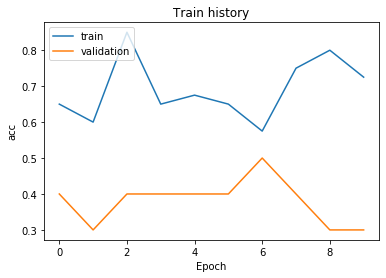

In [46]:
show_train_history(train_history,'acc','val_acc')

In [47]:
#評估模型準確率
scores=model.evaluate(x_img_test_normalize,y_label_test_onehot,verbose=0)
scores[1]

0.20000000298023224

In [48]:
#執行預測
prediction=model.predict_classes(x_img_test_normalize)

In [49]:
prediction

array([0, 1, 1, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1],
      dtype=int64)

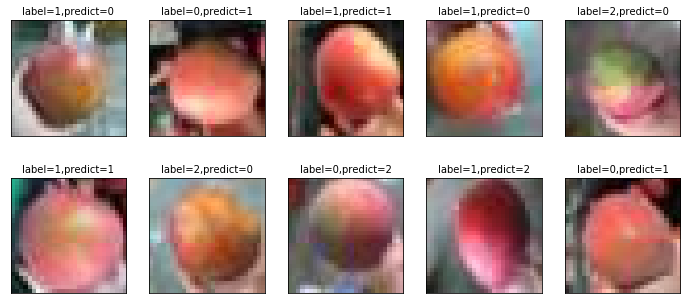

In [50]:
#顯示預測結果
plot_images_label_prediction(y,test_label,prediction,0,10)